# What's that Doggy in the Window?
## Recommendation System

By: **Bryan Santos**

Have you ever wanted to know the breed of dogs you see in social media or with other people because you like how they look, whether tough or cute?

This project aims to build an application that lets users upload images of a dog and to get its breed. The application will then assess the breed characteristics if it is suitable for the user based on lifestyle. If it is, then the system will redirect the user to dogs of that particular breed that is up for adoption. If not compatible, then the the system will suggest top five most compatible breeds.

The project will utilize multi-class image classification and recommendation systems machine learning models to achieve its goals.

The pet industry is a multi-billion dollar industry even just in the United States alone. The trend of owning pets is on a steady rise. Unfortunately, so do the number of dogs that would be without a permanent home or that would be euthanized. Many people buy dogs because of fad or appearances and abandon them, most likely because they do not realize that dogs of different breeds have unique characteristics and may not necessarily match their lifestyles.

***

This notebook tackles the second main part of this project after the multi-class image classification. This section aims to build a recommendation system to determine suitability of the breed of the image to the user.

Then plan is to create the following models:

* Breed recommendation based on similar breeds (either through cosine similarity or euclidean distance)
* Simple cosine similarity between the dog breed versus the lifestyle of the owner. If the similarity is more than .5, then the breed and the user is deemed compatible. Otherwise, the system will suggest breeds that are actually compatible.
* Breed recommendation based on user profile

## 1: Package Imports and Data Load

Below are the necessary packages to be able to build a recommendation system based on cosine similarity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances,cosine_similarity

import tensorflow as tf
import tensorflow_hub as hub
import keras

import os

Using TensorFlow backend.


Load the dogs characteristics dataset from dogtime

In [2]:
df = pd.read_csv('dogs.csv',index_col=0)
df.head(5)

,adaptability,adapts_well_to_apartment_living,good_for_novice_owners,sensitivity_level,tolerates_being_alone,tolerates_cold_weather,tolerates_hot_weather,all_around_friendliness,affectionate_with_family,kid_friendly_dogs,...,highlights,size_description,personality,health,care,feeding,coat_color_and_grooming,children_and_other_pets,rescue_groups,breed_organizations
breed,,,,,,,,,,,,,,,,,,,,,
bulldog-english,3,5,4,4,3,1,1,4,5,4,...,Bulldogs can be stubborn and lazy. Your mature...,Mature male Bulldogs weigh about 50 pounds; ma...,"Sociable and sweet, but with a reputation for ...","Like all breeds, Bulldogs are prone to certain...",Bulldogs are inactive indoors and don't requir...,Recommended daily amount: 1/2 to 2 cups of a h...,"Your Bulldog's coat should be straight, short,...",His amiable temperament and bulk make the Bull...,Bulldogs are sometimes purchased without any c...,"Below are breed clubs, organizations, and asso..."
spaniel-english-springer,3,1,3,4,1,3,4,5,5,5,...,English Springer Spaniels don't like to be lef...,English Springer Spaniels weigh between 45 and...,"The typical Springer is friendly, eager to ple...","Springers are generally healthy, but like all ...","English Springer Spaniels are loving, devoted ...",Recommended daily amount: 1.5 to 2 cups of hig...,"English Springer Spaniels have a double coat, ...",Springers usually do well with children if the...,English Springer Spaniels are often bought wit...,Not available
collie,4,3,4,5,2,4,3,5,5,5,...,The Collie is usually quiet unless she has a r...,Males stand 24 to 26 inches tall; females are ...,"The well-bred Collie is sweet, friendly, and g...","Collies are generally healthy, but like all br...",The Collie lives comfortably in the city or th...,Recommended daily amount: 2 to 3 cups of high-...,The Collie has two coat types: Rough (long hai...,The playful Collie is known for her love of ch...,Collies are often purchased without any clear ...,"Below are breed clubs, organizations, and asso..."
mastiff,2,2,1,3,3,4,1,4,5,5,...,"Mastiffs need daily exercise, but take into ac...",The minimum height for a male Mastiff is 30 in...,The proper Mastiff should be a combination of ...,"Mastiffs are generally healthy, but like all b...",Mastiffs are housedogs. They can adapt to any ...,How much your adult dog eats depends on their ...,"The Mastiff has a short, straight outer coat w...","Mastiffs love children. That said, they are la...",Mastiffs are often purchased without any clear...,Not available
spaniel-english-cocker,4,5,4,5,1,4,3,5,5,5,...,English Cocker Spaniels can be difficult to ho...,Male English Cocker Spaniels stand 16 to 17 in...,The English Cocker is described as merry and a...,"English Cockers are generally healthy, but lik...",English Cocker Spaniels are adaptable and can ...,Recommended daily amount: 1 to 2 cups of high-...,English Cocker Spaniels have medium-long coats...,"English Cockers are friendly, fun-loving, and ...",English Cockers are often purchased without an...,Not available


In [3]:
dogs_df = df[['adaptability', 
            'all_around_friendliness', 
            'health_and_grooming_needs', 
            'trainability', 
            'physical_needs',
            'adapts_well_to_apartment_living', 
            'good_for_novice_owners', 
            'sensitivity_level', 
            'tolerates_being_alone', 
            'tolerates_cold_weather', 
            'tolerates_hot_weather', 
            'affectionate_with_family', 
            'kid_friendly_dogs', 
            'dog_friendly', 
            'friendly_towards_strangers', 
            'amount_of_shedding', 
            'drooling_potential', 
            'easy_to_groom', 
            'general_health', 
            'potential_for_weight_gain', 
            'size', 
            'easy_to_train', 
            'intelligence', 
            'potential_for_mouthiness', 
            'prey_drive', 
            'tendency_to_bark_or_howl', 
            'wanderlust_potential',
            'energy_level',
            'intensity',
            'exercise_needs',
            'potential_for_playfulness']]
dogs_df.head(5)

,adaptability,all_around_friendliness,health_and_grooming_needs,trainability,physical_needs,adapts_well_to_apartment_living,good_for_novice_owners,sensitivity_level,tolerates_being_alone,tolerates_cold_weather,...,easy_to_train,intelligence,potential_for_mouthiness,prey_drive,tendency_to_bark_or_howl,wanderlust_potential,energy_level,intensity,exercise_needs,potential_for_playfulness
breed,,,,,,,,,,,,,,,,,,,,,
bulldog-english,3,4,4,2,3,5,4,4,3,1,...,3,2,2,2,4,1,2,3,3,4
spaniel-english-springer,3,5,3,4,5,1,3,4,1,3,...,5,5,3,5,3,4,5,3,5,5
collie,4,5,3,3,3,3,4,5,2,4,...,4,4,3,4,4,1,3,2,3,4
mastiff,2,4,4,2,4,2,1,3,3,4,...,3,2,4,2,2,1,3,3,4,4
spaniel-english-cocker,4,5,3,4,4,5,4,5,1,4,...,4,5,3,5,4,4,5,3,4,5


***

## 2: Functions for Reuse

This section will contain all the functions needed to make different types of recommendations.

### Recommendation System Functions

In [4]:
def overall_recommender(breed,dist='cosine'):
    '''
    This function provides a basic recommendation model where it provides most similar 
    breeds based on an input breed.
    
    Parameters: 
    - breed - name of breed (string)
    
    Output: 
    - 5 breeds with most similar temperaments according to dogtime.com ratings
    '''
    y = dogs_df.loc[[breed],:]
    euc_dists = euclidean_distances(dogs_df.values,y.values)
    euc_ind = np.argsort(euc_dists.flatten())
    cos_dists = cosine_similarity(dogs_df.values,y.values)
    cos_ind = np.argsort(cos_dists.flatten())
    if dist == 'euclidean':
        return [dogs_df.iloc[ind,:].name for ind in euc_ind][1:6]
    elif dist == 'cosine':
        return [dogs_df.iloc[ind,:].name for ind in cos_ind][-1:-6:-1]

In [6]:
def compatibility_score(profile, breed, dist='cosine'):
    '''
    This function computes the compability score between a user profile and a dog breed
    based on cosine similarity.
    
    Parameters: 
    - lifestyle profile
    - breed for checking
    
    Output: 
    - Cosing similarity score from 0.0 - 1.0
    '''
    y = profile
    euc_dists = euclidean_distances(dogs_df.loc[(dogs_df.index == breed)].values,y)
    euc_ind = np.argsort(euc_dists.flatten())
    cos_dists = cosine_similarity(dogs_df.loc[(dogs_df.index == breed)].values,y)
    cos_ind = np.argsort(cos_dists.flatten())
    if dist == 'euclidean':
        return euc_dists
    elif dist == 'cosine':
        return cos_dists

In [7]:
def profile_recommender(profile, breed, dist='cosine'):
    '''
    This function checks whether the chosen breed is compatible with the user.
    
    Input: 
    - profile of the user
    - breed
    Output: 
    - A flag is compatible and top 5 most compatible breeds if not
    '''
    score = compatibility_score(profile, breed)
    if score >= 0.8:
        print("Congratulations! The breed is compatible with you. Adopt any of these dogs.")
    else:
        
        y = profile
        euc_dists = euclidean_distances(dogs_df.values,y)
        euc_ind = np.argsort(euc_dists.flatten())
        cos_dists = cosine_similarity(dogs_df.values,y)
        cos_ind = np.argsort(cos_dists.flatten())
        if dist == 'euclidean':
            return [dogs_df.iloc[ind,:].name for ind in euc_ind][1:6]
        elif dist == 'cosine':
            return [dogs_df.iloc[ind,:].name for ind in cos_ind][-1:-6:-1]

### Image Classification Functions

In [8]:
def load_model(model_path):
    '''
    Loads a saved model from a specified path.
    
    Parameter:
    - model path = location of the saved .hdf5 model
    
    Returns:
    - Loaded model
    
    '''
    print(f"Loading saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [9]:
### This code block converts all images into tensors and in the desired dimension

### Standard size for image classification is 224
IMG_SIZE = 224

def process_image(image_path):
    '''
    This function takes in an image then resizes and converts it into
    Tensors and desired dimensions.
    
    Parameters:
    - image_path = image
    
    Output:
    - Resized image in tensor format
    
    '''
    ### Read in image file
    image = tf.io.read_file(image_path)
    
    ### Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
    image = tf.image.decode_jpeg(image, channels=3)

    ### Convert the colour channel values from 0-225 values to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
  
    ### Resize the image to desired size (224, 244)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

    return image

In [10]:
def get_image_label(image_path, label):
  '''
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label)
  
  Parameters:
  - image_path = where the image is located
  - label = corresponding image class
  
  Returns:
  - images and labels resized and converted into tensors
  '''
  image = process_image(image_path)
  return image, label

In [11]:
### Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    '''
    Creates batches of data out of image (features) and label (target) pairs.
    Shuffles the data if it's training data.
  
    Parameters:
    - x = features/images
    - y = target
    - batch_size = size of batch (32 is standard)
    - valid_data = whether for validation

    '''
    # If the data is a test dataset, we probably don't have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
  
    # If the data if a valid dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        # If the data is a training dataset, we shuffle it
        print("Creating training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(x))

        # Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)

        # Turn the data into batches
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [12]:
def get_pred_label(prediction_probabilities):
    '''
    Turns an array of prediction probabilities into a label.
    
    Parameters:
    - prediction probabilities
    
    Returns:
    - actual breed predicted
    '''  

    return unique_breeds[np.argmax(prediction_probabilities)]

### Get a predicted label based on an array of prediction probabilities
# pred_label = get_pred_label(predictions[0])
# pred_label

***

## 3: Similar breeds recommendations

This section builds a very basic model by which breeds are recommended based on similarities of a breed that's inputted. Below tests the recommendations. This will be used if the chosen breed is not suitable to the user.

In [13]:
overall_recommender('boxer')

['boxer', 'retriever-labrador', 'bulldog-french', 'rottweiler', 'pug']

In [14]:
overall_recommender('boxer',dist='euclidean')

['bulldog-french',
 'pug',
 'rottweiler',
 'terrier-westhighland',
 'corgi-pembroke-welsh']

***

## 4: User lifestyle survey

Before the actual lifestyle survey is created, I want to test inputting attribute scores into a dataframe in order to generate the cosine similarity score with a specific breed.

In [15]:
columns = list(dogs_df.columns)

a = dogs_df.describe().T['mean'].values
profile_df = pd.DataFrame(a.reshape(-1, len(a)),columns=columns)
profile_df

,adaptability,all_around_friendliness,health_and_grooming_needs,trainability,physical_needs,adapts_well_to_apartment_living,good_for_novice_owners,sensitivity_level,tolerates_being_alone,tolerates_cold_weather,...,easy_to_train,intelligence,potential_for_mouthiness,prey_drive,tendency_to_bark_or_howl,wanderlust_potential,energy_level,intensity,exercise_needs,potential_for_playfulness
0,3.08,4.26,3.18,3.5,4.12,3.0,3.04,4.26,1.68,3.1,...,3.94,4.12,3.18,3.52,3.1,3.06,4.02,3.36,3.9,4.48


In [16]:
dogs_df.loc[(dogs_df.index == 'boxer')]

,adaptability,all_around_friendliness,health_and_grooming_needs,trainability,physical_needs,adapts_well_to_apartment_living,good_for_novice_owners,sensitivity_level,tolerates_being_alone,tolerates_cold_weather,...,easy_to_train,intelligence,potential_for_mouthiness,prey_drive,tendency_to_bark_or_howl,wanderlust_potential,energy_level,intensity,exercise_needs,potential_for_playfulness
breed,,,,,,,,,,,,,,,,,,,,,
boxer,3,4,3,3,5,4,3,4,1,2,...,4,4,2,3,3,3,5,5,5,5


In [24]:
profile = dogs_df.describe().T['mean'].values
profile

array([3.08, 4.26, 3.18, 3.5 , 4.12, 3.  , 3.04, 4.26, 1.68, 3.1 , 2.86,
       4.92, 4.16, 3.68, 3.76, 3.4 , 2.28, 3.32, 2.9 , 3.66, 2.86, 3.94,
       4.12, 3.18, 3.52, 3.1 , 3.06, 4.02, 3.36, 3.9 , 4.48])

In [22]:
profile_df

,adaptability,all_around_friendliness,health_and_grooming_needs,trainability,physical_needs,adapts_well_to_apartment_living,good_for_novice_owners,sensitivity_level,tolerates_being_alone,tolerates_cold_weather,...,intelligence,potential_for_mouthiness,prey_drive,tendency_to_bark_or_howl,wanderlust_potential,energy_level,intensity,exercise_needs,potential_for_playfulness,0
0,5.0,5.0,3.18,3.5,4.12,3.0,3.04,4.26,1.68,3.1,...,4.12,3.18,3.52,3.1,3.06,4.02,3.36,3.9,4.48,5.0


In [264]:
compatibility_score(profile_df.values,'boxer')

array([[0.94817448]])

We need to revisit the correlation matrix in order to come up with the fewest questions possible that would hit all 31 dog characteristics. This means that we will combine two or more attributes answerable by a single question. Our system will not be usable if there are 31 questions that should be answered.

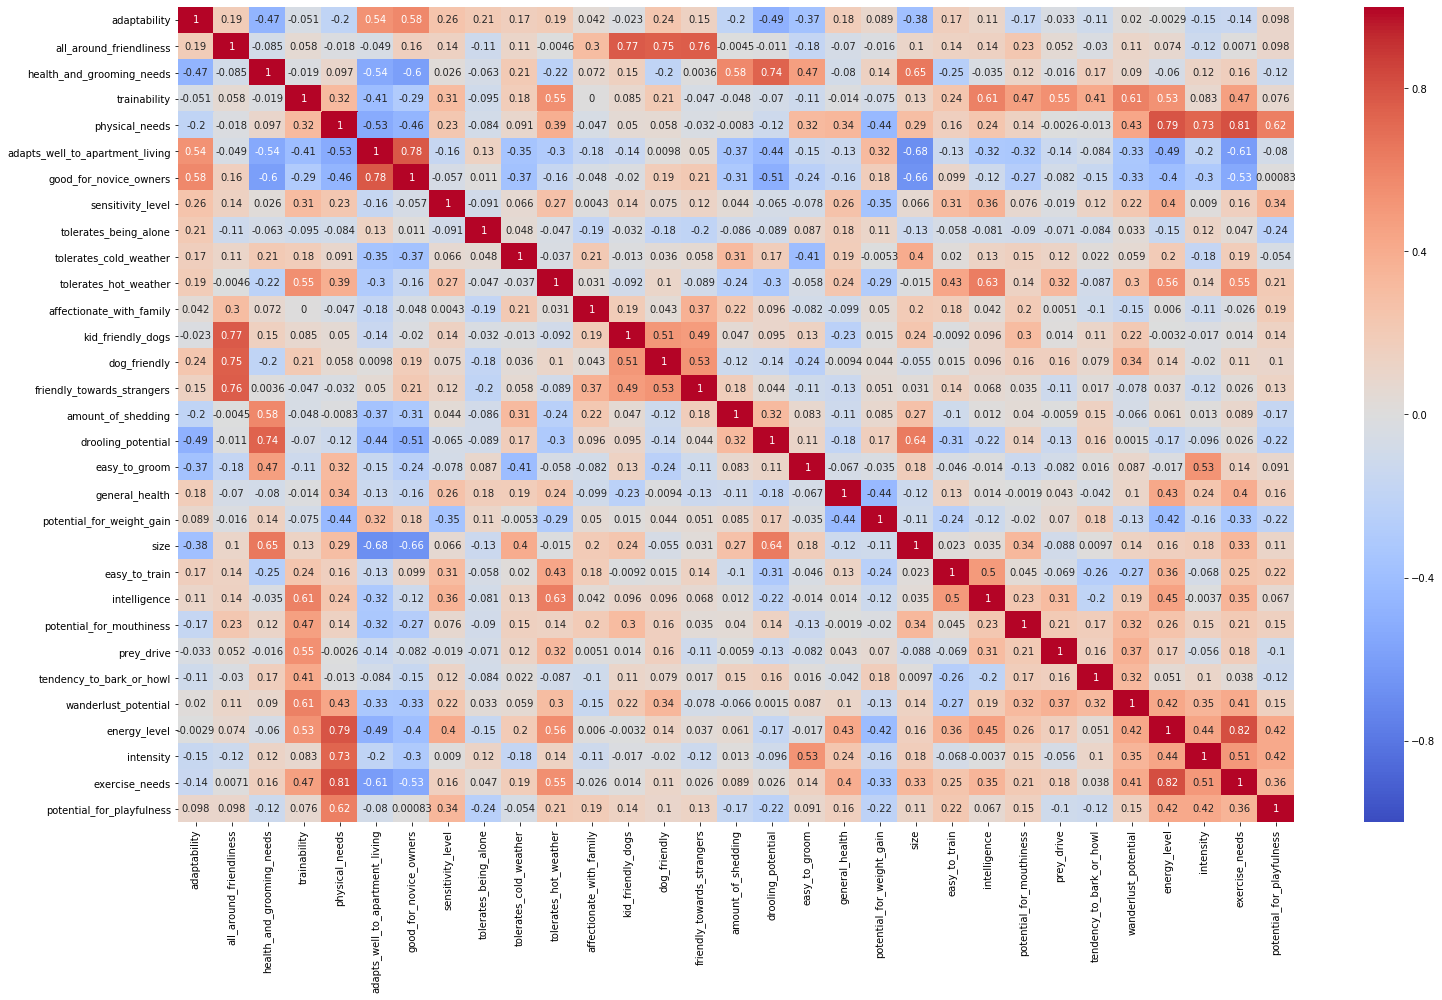

In [138]:
### Plot correlation between all attributes
f, ax = plt.subplots(figsize=(25, 15))
matrix = np.triu(dogs_df.corr())
sns.heatmap(dogs_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

Here is the section where we will list all of the lifestyle survey questions with corresponding score (from 1 to 5) based on the answer.

### Question 1: How often do you exercise?
5: Very frequently

4: Frequently

3: Occassionally

2: Sometimes

1: What's exercise?

Covers the following attributes: Energy Level, Exercise Needs, Intensity, Potential for Playfulness, Physical Needs, Potential for Weight Gain (inverse)

### Question 2: What best describes your home?
5: Small condo or apartment, no yard

3: Medium-sized apartment or small house without a yard

1: House with a yard

Covers the following attributes: Adapts Well to Apartment Living, Adaptability, Good for Novice Owners, Size

### Question 3: How important is affection from your dog?
5: Affection is a must!

3: It's not a dealbreaker but I would like an occassionally cuddly/sweet dog

1: Not really a factor

Covers: Affectionate with Family

### Question 4: Do you mind cleaning up after your dog? How about grooming them?
5: It's perfectly fine, I'm totally willing!

3: I don't mind a few fur or slobber, I will give him dog baths

1: I hate fur and drool! I don't have time combing dogs!

Covers: Amount of Shedding, Drooling Potential, Easy to Groom, Health and Grooming Needs

### Question 5: Do you have experience training a dog?
5: I don't have a lot of training experience

4: A little, there's always Youtube

3: Some, I plan on hiring a professional trainer

1: I'm the dog whisperer!

Covers: Trainability, Easy to Train, Tendency to Bark or Howl (inverse), Potential for Mouthiness (inverse)

### Question 6: What will the social life of your dog be like?
5: I will bring my dog everywhere - parks, restaurants, malls, my office!

3: Occassional walks in the park, visiting friends and family

1: Just at home, always Netflix and Chill

Covers: Dog Friendly, Friendly Toward Strangers, Sensitivity Level (inverse)

### Question 7: Are there children in your home?
5: Yes, they are 7 years old and under

4: Yes, they are older then 8 years old

2: I don't have children at home but I have been thinking about having children

1: I don't have children at home nor do I intend to

Covers: Incredibly Kid Friendly Dogs, All Around Friendliness

### Question 8: Do you need a dog for special needs? Or just as a pet?
5: Yes, I need them smart!

3: I want them to be responsive but not a dealbreaker

1: I just want a pet

Covers: Intelligence

### Question 9: Do you plan on leaving your dog alone at home during workdays?
5: I'm planning to leave him alone until I get back around dinnertime

3: I'll try my best to ensure he's walked, schedule permitting

1: There will always be someone with him / I'll hire a dogsitter

Covers: Tolerates Being Alone, Wanderlust Potential (inverse), Prey Drive (inverse)

### Question 10: What's the climate/temperature like in  your home?
5: Colder than average

3: Pretty average

1: Warmer than average

Covers: Tolerates Cold Weather, Tolerates Hot Weather (inverse)

### Question 11: Financially speaking, are you aware and ready of the expenses?
5: He will just eat what I eat; I don't believe in vets

3: Yes, I will budget for my dog's needs each month after all my other expenses

1: Sky's the limit for my baby! Nothing but the best.

Covers: General Health

Below is the summary of the questions for each attribute.

Index - Question Number - Inverse or not - Trait

        0 - 2 'adaptability', 
        1 - 7 'all_around_friendliness', 
        2 - 4 'health_and_grooming_needs', 
        3 - 5 'trainability', 
        4 - 1 'physical_needs',
        5 - 2 'adapts_well_to_apartment_living', 
        6 - 2 'good_for_novice_owners', 
        7 - 6 inverse 'sensitivity_level', 
        8 - 9 'tolerates_being_alone', 
        9 - 10 'tolerates_cold_weather', 
        10 - 10 inverse 'tolerates_hot_weather', 
        11 - 3 'affectionate_with_family', 
        12 - 7 'kid_friendly_dogs', 
        13 - 6 'dog_friendly', 
        14 - 6 'friendly_towards_strangers', 
        15 - 4 'amount_of_shedding', 
        16 - 4 'drooling_potential', 
        17 - 4 'easy_to_groom', 
        18 - 11 'general_health', 
        19 - 1 inverse 'potential_for_weight_gain', 
        20 - 2 'size', 
        21 - 5 'easy_to_train', 
        22 - 8 'intelligence', 
        23 - 5 inverse 'potential_for_mouthiness', 
        24 - 9 inverse 'prey_drive', 
        25 - 5 inverse 'tendency_to_bark_or_howl', 
        26 - 9 inverse 'wanderlust_potential',
        27 - 1 'energy_level',
        28 - 1 'intensity',
        29 - 1 'exercise_needs',
        30 - 1 'potential_for_playfulness'

***

## 5: Recommendation workflow

This section basically runs through the entire workflow of this project.

### Step 1. Load model

In [142]:
# Load our model trained on 1000 images
model_mobilenet = load_model('models/weights.best.mobilenet.hdf5')

Loading saved model from: models/weights.best.mobilenet.hdf5


### Step 2. Predict user image

In [273]:
### Get custom image filepaths
custom_path = "predict/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]
#custom_image_paths = custom_path

In [274]:
### Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches...


In [162]:
### Make predictions on the custom data
custom_preds = model_mobilenet.predict(custom_data)

In [174]:
unique_breeds = pd.read_csv('unique_breeds.csv', index_col = 0)

In [176]:
unique_breeds = unique_breeds['0']

In [177]:
### Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['boxer']

In [208]:
get_pred_label(custom_preds[0])

'boxer'

### Step 3. Check compatibility score

In [211]:
### Get compatibility score
compatibility_score(profile_df.values,get_pred_label(custom_preds[0]))

array([[0.97721624]])

In [265]:
### Check if score is enough
profile_recommender(profile_df.values,get_pred_label(custom_preds[0]))

Congratulations! The breed is compatible with you. Adope these dogs.


In [269]:
### If not enough, provide top 5 compatible breeds
profile_recommender(profile_df.values,get_pred_label(custom_preds[0]))

['shihtzu', 'havanese', 'collie', 'terrier-westhighland', 'frise-bichon']

### Step 4. Connect to actual dogs for adoption

In [37]:
df

,adaptability,adapts_well_to_apartment_living,good_for_novice_owners,sensitivity_level,tolerates_being_alone,tolerates_cold_weather,tolerates_hot_weather,all_around_friendliness,affectionate_with_family,kid_friendly_dogs,...,highlights,size_description,personality,health,care,feeding,coat_color_and_grooming,children_and_other_pets,rescue_groups,breed_organizations
breed,,,,,,,,,,,,,,,,,,,,,
bulldog-english,3,5,4,4,3,1,1,4,5,4,...,Bulldogs can be stubborn and lazy. Your mature...,Mature male Bulldogs weigh about 50 pounds; ma...,"Sociable and sweet, but with a reputation for ...","Like all breeds, Bulldogs are prone to certain...",Bulldogs are inactive indoors and don't requir...,Recommended daily amount: 1/2 to 2 cups of a h...,"Your Bulldog's coat should be straight, short,...",His amiable temperament and bulk make the Bull...,Bulldogs are sometimes purchased without any c...,"Below are breed clubs, organizations, and asso..."
spaniel-english-springer,3,1,3,4,1,3,4,5,5,5,...,English Springer Spaniels don't like to be lef...,English Springer Spaniels weigh between 45 and...,"The typical Springer is friendly, eager to ple...","Springers are generally healthy, but like all ...","English Springer Spaniels are loving, devoted ...",Recommended daily amount: 1.5 to 2 cups of hig...,"English Springer Spaniels have a double coat, ...",Springers usually do well with children if the...,English Springer Spaniels are often bought wit...,Not available
collie,4,3,4,5,2,4,3,5,5,5,...,The Collie is usually quiet unless she has a r...,Males stand 24 to 26 inches tall; females are ...,"The well-bred Collie is sweet, friendly, and g...","Collies are generally healthy, but like all br...",The Collie lives comfortably in the city or th...,Recommended daily amount: 2 to 3 cups of high-...,The Collie has two coat types: Rough (long hai...,The playful Collie is known for her love of ch...,Collies are often purchased without any clear ...,"Below are breed clubs, organizations, and asso..."
mastiff,2,2,1,3,3,4,1,4,5,5,...,"Mastiffs need daily exercise, but take into ac...",The minimum height for a male Mastiff is 30 in...,The proper Mastiff should be a combination of ...,"Mastiffs are generally healthy, but like all b...",Mastiffs are housedogs. They can adapt to any ...,How much your adult dog eats depends on their ...,"The Mastiff has a short, straight outer coat w...","Mastiffs love children. That said, they are la...",Mastiffs are often purchased without any clear...,Not available
spaniel-english-cocker,4,5,4,5,1,4,3,5,5,5,...,English Cocker Spaniels can be difficult to ho...,Male English Cocker Spaniels stand 16 to 17 in...,The English Cocker is described as merry and a...,"English Cockers are generally healthy, but lik...",English Cocker Spaniels are adaptable and can ...,Recommended daily amount: 1 to 2 cups of high-...,English Cocker Spaniels have medium-long coats...,"English Cockers are friendly, fun-loving, and ...",English Cockers are often purchased without an...,Not available
havanese,4,5,5,4,1,3,4,5,5,4,...,The Havanese is a companion dog that thrives o...,Males and females stand 8 1/2 to 11 1/2 inches...,The Havanese is a gentle and affectionate bree...,"Havanese are generally healthy, but like all b...","Although the Havanese is a small breed, he has...",Recommended daily amount: 1/2 to 1 cup of high...,"The Havanese coat is thick but silky, soft, an...",The Havanese is an excellent family dog who's ...,Havanese are often purchased without any clear...,Havanese Club of America
frise-bichon,4,5,5,5,1,3,4,5,5,4,...,Bichons can be difficult to housebreak. Crate ...,Males and females stand about 9 to 11 inches t...,A cheerful attitude is the outstanding trait o...,"Bichons are generally healthy, but like all br...",Bichons are active dogs but do well as apartme...,Recommended daily amount: 1/2 to 1.5 cups of h...,"The Bichon Frise is a double-coated breed, alw...",Bichons are good family dogs and wonderful com...,Bichons are often purchase

In [38]:
adf = df.loc[(df.index == 'boxer')]

In [56]:
#health = adf['health'].astype(string)
health = adf['health'].to_string()

In [60]:
pd.options.display.max_colwidth = 1000
health

'breed\nboxer    Boxers are generally healthy, but like all bre...'

In [62]:
adf['health'].str.split(' ').str[0]

breed
boxer    Boxers
Name: health, dtype: object

In [63]:
adoption_df = pd.read_csv('adoption_dogs.csv', index_col = 0)

In [64]:
adoption_df.columns

Index(['link', 'name', 'sex', 'age', 'breed'], dtype='object')

In [73]:
breed = 'Boxer'

In [77]:
adf = adoption_df.loc[(adoption_df['breed'].str.contains(breed.title()))]

In [78]:
adf

,link,name,sex,age,breed
86,https://www.petfinder.com/dog/buddy-47912481/ny/glenfield/lewis-county-humane-society-ny52/,Buddy,Male,Adult,Rottweiler & Boxer Mix
110,https://www.petfinder.com/dog/tino-46453167/ny/sprakers/ayres-memorial-animal-shelter-ny360/,Tino,Male,Adult,Boxer Mix
164,https://www.petfinder.com/dog/cain-47833051/ny/seneca-falls/fetch-a-friend-rescue-ny1044/,Cain,Male,Young,American Bulldog & Boxer Mix
167,https://www.petfinder.com/dog/ramsey-43729539/ny/binghamton/charlies-crusaders-pet-rescue-ms192/,Ramsey,Male,Adult,Pit Bull Terrier & Boxer Mix
170,https://www.petfinder.com/dog/tara-47901785/ny/amsterdam/montgomery-county-spca-ny203/,Tara,Female,Senior,Boxer Mix
...,...,...,...,...,...
63257,https://www.petfinder.com/dog/bella-boxer-45958569/ca/pacific-grove/peace-of-mind-dog-rescue-ca1623/,Bella Boxer,Female,Senior,Boxer Mix
63301,https://www.petfinder.com/dog/stella-44618530/ca/la-honda/wkodit-ca874/,Stella,Female,Adult,Pit Bull Terrier & Boxer Mix
63306,https://www.petfinder.com/dog/chong-46919658/ca/fort-bragg/mendocino-coast-humane-society-ca314/,Chong,Male,Young,Boxer Mix
63308,https://www.petfinder.com/dog/gypsy-44962814/ca/fort-bragg/mendocino-coast-humane-society-ca314/,Gypsy,Female,Adult,Akita & Boxer Mix
